# Cognitive Algorithms - Assignment 2 (30 points)
Cognitive Algorithms        
Winterterm 2017/2018      
Technische Universität Berlin     
Fachgebiet Machinelles Lernen 

**Due on November 16, 2017 10am via ISIS **
                   
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.**

# Part 2: Programming (23 points)
---
The linear perceptron and NCC are linear classification methods. Given training data
$$ (\mathbf{x_1}, y_1),\ldots, ( \mathbf{x_n}, y_n ) \in \mathbb{R}^d \times \{-1,1\}$$
their goal is to learn a weight vector $\mathbf{w}$ and a bias term $b$, such that each new data point $\mathbf{x} \in \mathbb{R}^d $ will be assigned to the correct class label via the following function:
$$ \mathbf x \mapsto  \mbox{sign}(\mathbf w^T \cdot \mathbf x - b). $$


The two methods use different strategies to achieve this goal.
You will programm and compare the perceptron and the prototype classifier and use them to predict handwritten digits. The task is to classify one digit against all others.         
If not done yet, download the data set ```usps.mat``` from the ISIS web site.  
Below you can find some useful functions for loading the data and plotting images. 

In [1]:
import scipy as sp
import scipy.io as io
import pylab as pl
%matplotlib inline

In [2]:
''' ---- Functions for loading and plotting the images ---- '''
def load_usps_data(fname, digit=3):
    ''' Loads USPS (United State Postal Service) data from <fname> 
    Definition:  X, Y = load_usps_data(fname, digit = 3)
    Input:       fname   - string
                 digit   - optional, integer between 0 and 9, default is 3
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels
                                 1 - where picture contains the <digit>
                                -1 - otherwise                           
    '''
    # load the data
    data = io.loadmat(fname)
    # extract images and labels
    X = data['data_patterns']
    Y = data['data_labels']
    Y = Y[digit,:]
    return X, Y

def plot_img(a):
    ''' Plots one image 
    Definition: plot_img(a) 
    Input:      a - 1D array that contains an image 
    '''   
    a2 = sp.reshape(a,(int(sp.sqrt(a.shape[0])), int(sp.sqrt(a.shape[0]))))
    pl.imshow(a2, cmap='gray') 
    pl.colorbar()
    pl.setp(pl.gca(), xticks=[], yticks=[])
            
def plot_imgs(X, Y):   
    ''' Plots 3 images from each of the two classes 
    Definition:         plot_imgs(X,Y)
    Input:       X       -  DxN array of N pictures with D pixel
                 Y       -  1D array of length N of class labels {1, -1}                  
    '''
    pl.figure()
    for i in sp.arange(3):
        classpos = (Y == 1).nonzero()[0]
        m = classpos[sp.random.random_integers(0, classpos.shape[0]-1)]
        pl.subplot(2,3,1+i)
        plot_img(X[:, m])
    for i in sp.arange(3):
        classneg = (Y != 1).nonzero()[0]
        m = classneg[sp.random.random_integers(0, classneg.shape[0]-1)]
        pl.subplot(2,3,4+i)
        plot_img(X[:, m])

**A) (1 points)**  The data set ```usps.mat``` contains handwritten digits from the U.S. Postal Service data set. Familiarize yourself with the data by loading the data and plotting some images, with the provided functions ```load_usps_data```  and  ```plot_imgs```. Fill in the gaps below.              
                      
The data set contains **2007** images.           
Each image consits of **256** pixels. 

In [8]:
f = 'usps.mat'
x, y = load_usps_data(f)
print(x.shape)
print(y.shape)

(256, 2007)
(2007,)


**B) (6 points)** Implement a linear perceptron by completing the function stub  ```train_perceptron```. We will test three different types of update rules for the learning rate (```option``` $ \in \{0,1,2\}$).
$$ \text{learning rate}(t) = \begin{cases} \frac{\eta}{1+t} & \text{if} & \text{option} = 0  \\ \eta & \text{if} & \text{option} = 1 \\ \eta \cdot (1+t) & \text{if} & \text{option} = 3 \end{cases} $$
where $t$ is the current iteration and $\eta$ the initial value of the learning rate.           

In [154]:
def train_perceptron(X,Y,iterations=200,eta=.1, option=0):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
                 option  -  optional, defines how eta is updated in each iteration
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
                 acc     -  1D array of length iter, contains classification accuracies 
                            after each iteration  
                            Accuracy = #correctly classified points / N 
    '''
    assert option == 0 or option == 1 or option == 2
    acc = sp.zeros((iterations))
    #include the bias term by adding a row of ones to X 
    X = sp.concatenate((sp.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = sp.ones((X.shape[0]))/X.shape[0]
    for it in sp.arange(iterations):
        # indices of misclassified data
        wrong = (sp.sign(weights.dot(X)) != Y).nonzero()[0]
        
        # compute accuracy acc[it] (1 point)
        acc[it] = float(X.shape[1]-wrong.shape[0]) / float(X.shape[1])
            
        if wrong.shape[0] > 0:
            # pick a random misclassified data point (2 points)
            ind = sp.random.randint(wrong.shape[0])
            r = wrong[ind]
            point = X[:,r]
            
            
            #update weight vector (using different learning rates ) (each 1 point)
            if option == 0:
                
                weights += (eta/(1+it)) * point * Y[r]
            
            elif option == 1:
                weights = weights + eta * point * Y[r]
            elif option == 2:
                weights = weights + (eta*(1+it)) * point * Y[r]
                
    b = -weights[0] 
    w = weights[1:]
    #print(acc[it])
    #return weight vector, bias and accuracies
    return w,b,acc

''' --------------------------------------------------------------------------------- '''
def analyse_accuracies_perceptron(digit = 3, option=0):
    ''' Loads usps.mat data and plots digit recognition accuracy in the linear perceptron
    Definition: analyse_perceptron(digit = 3)
    '''
    X,Y = load_usps_data('usps.mat',digit)
    w_per,b_per,acc = train_perceptron(X,Y, option=option)
    
    pl.figure()
    pl.plot(sp.arange(len(acc)),acc)
    pl.title('Digit recognition accuracy')      
    pl.xlabel('Iterations')
    pl.ylabel('Accuracy')

**C) (4 points)** Call the function ```analyse_accuracies_perceptron``` for a digit of your choice and all three possible ```options```. It plots the classification accuracy, i.e. the percentage of correctly classified data points, as a function of iterations. Answer the following questions:    
- Does the accuracy converge (asymptotically)?
- What difference do you notice for the different update rules of the learning rate? Try to explain this behaviour.
- Which ```option``` would you prefer? Why?


- **the initial weights seem to be quite good. all three learning options make the accuracy worse by starting learning. the accuracy converges not really. there is a tendency to 100 %, which you can see especially in option 0. the fluctuation is quite high,especially in option 1 and 2**
- **option 0 has the less fluctuation, the higher the iteration. option 1 has more fluctuation. option 3 has really strong fluctuations, even in the end. when you stop randomly at the wrong iteration, you can get really bad weights**
- **option 0: with higher iterations, the learning rate gets smaller and smaller. by that the fluctuation is low and the accuracy gets continously better**


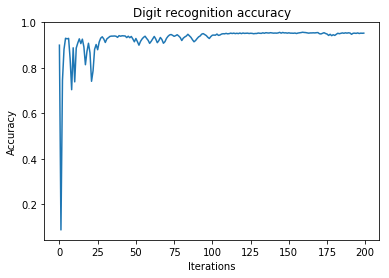

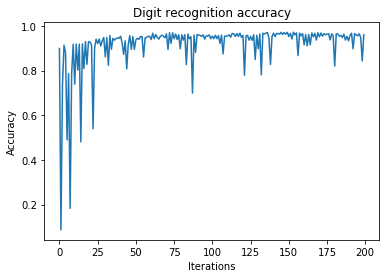

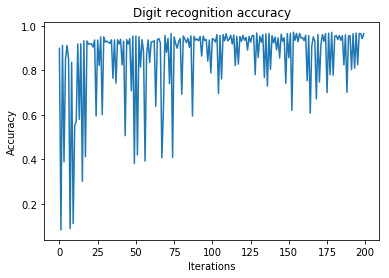

In [198]:
analyse_accuracies_perceptron(digit=3, option=0)
analyse_accuracies_perceptron(digit=3, option=1)
analyse_accuracies_perceptron(digit=3, option=2)

**D) (3 points)** Implement a Prototype/Nearest Centroid Classifier by completing the function stub ```train_ncc```. Note that points will be deducted for the use of loops. 

In [148]:
def train_ncc(X,Y):
    ''' Trains a prototype/nearest centroid classifier
    Definition:  w, b   = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    # ... your code here 
    group0 = (Y == 1).dot(X.T) / Y.shape[0]
    group1 = (Y == -1).dot(X.T) / Y.shape[0]
    
    w = group0 - group1
    b = 0.5 * (group0.T.dot(group0) - group1.T.dot(group1))
    
    return w,b

**E) (4 points)** Complete the function stub ```plot_histogram``` that calculates the classification accuracy and plots a histogram of classifier output $\mathbf w^T \mathbf x$ for each class.

In [194]:
def plot_histogram(X, Y, w, b):
    ''' Plots a histogram of classifier outputs (w^T X) for each class with pl.hist 
    The title of the histogram is the accuracy of the classification
    Accuracy = #correctly classified points / N 
    
    Definition:     plot_histogram(X, Y, w, b)
    Input:          X       -  DxN array of N data points with D features
                    Y       -  1D array of length N of class labels
                    w       -  1D array of length D, weight vector 
                    b       -  bias term for linear classification   
    
    '''
    # ... your code here 
    out = w.T.dot(X) - b
    
    Yout = sp.sign(out)
    
    wrong = (Yout != Y).nonzero()[0]
        
    # compute accuracy acc[it] (1 point)
    acc = float(X.shape[1]-wrong.shape[0]) / float(X.shape[1])
    
    pl.hist(out) 
#    plt.scatter(x1[y==1],x2[y==1],color='Red',label='Class 1') 

    pl.grid(True)
    pl.title(acc)
    pl.axhline(0, color='black')
    pl.axvline(0, color='black')
    pl.show()       
    
''' --------------------------------------------------------------------------------- '''
def compare_classifiers(digit = 3):
    ''' Loads usps.mat data, trains the perceptron and the Nearest centroid classifiers, 
    and plots their weight vector and classifier output
    Definition: compare_classifiers(digit = 3)
    '''
    X,Y = load_usps_data('usps.mat',digit)
    w_ncc,b_ncc = train_ncc(X,Y)
    w_per,b_per,_ = train_perceptron(X,Y)
    
    pl.figure()
    pl.subplot(2,2,1)
    plot_img(w_ncc)
    pl.title('NCC')
    pl.subplot(2,2,3)
    plot_histogram(X, Y, w_ncc, b_ncc)
    
    pl.subplot(2,2,2)
    plot_img(w_per)
    pl.title('Perceptron')
    pl.subplot(2,2,4)
    plot_histogram(X, Y, w_per, b_per)

**F) (4 points)** Call ```compare_classifiers``` for a digit of your choice. It plots, for both the perceptron and the nearest centroid classifier, the histogram of classifier outputs and the weight vector. Call the function several times for different digits and answer the following questions:
- Do you notice a performance difference for the different digits? Why could this be? 
- Show the histograms of the digits with highest difference in accuracy. 
- Which algorithm (Nearest Centroid Classifier or Perceptron) would you prefer for this task? Why?

- **yes. the sampling is not equal for each digit. for Perceptron we have a random pick**
- **histograms with highest accuracy difference is for digit = 1**
- **here the Perceptron is preferable, because the accuracy is for all digits higher**

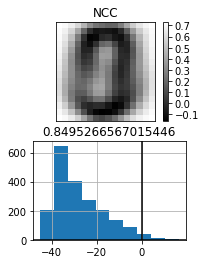

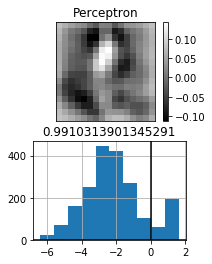

In [204]:
'''
compare_classifiers(0)
compare_classifiers(2)
compare_classifiers(3)
compare_classifiers(4)
compare_classifiers(5)
compare_classifiers(6)
compare_classifiers(7)
compare_classifiers(8)
compare_classifiers(9)'''

compare_classifiers(1)

**G) (1 points)**  In this task, you have trained and tested the algorithm on the same data set. Is this enough to reach a final conclusion on which algorithms performs good on this type of data? Why?

**No, because the algorithms are trained and testet with the same data. for a final conclusion we need to test it with new data that was not used for training
**